In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


LOADING THE DATA ⏳

In [4]:
# Firsly, load the dataset
dataset = pd.read_csv('Iris.csv')
dataset.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [77]:
dataset.drop('Id', axis=1, inplace=True)

EXPLORATORY DATA ANALYSIS (EDA) 📈📊

In [78]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

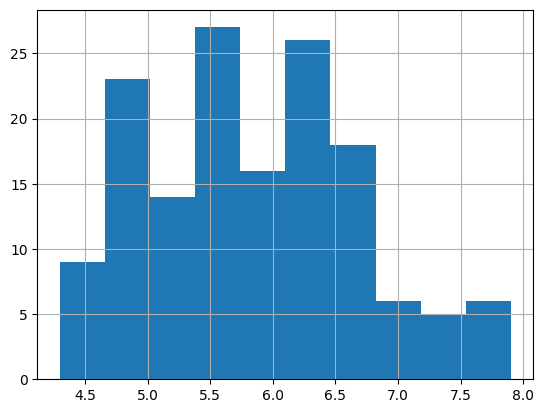

In [79]:
#Histograms of the dataset
dataset['SepalLengthCm'].hist()

<Axes: >

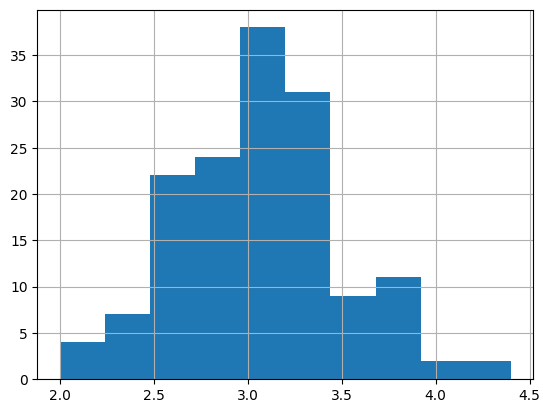

In [80]:
dataset['SepalWidthCm'].hist()

<Axes: >

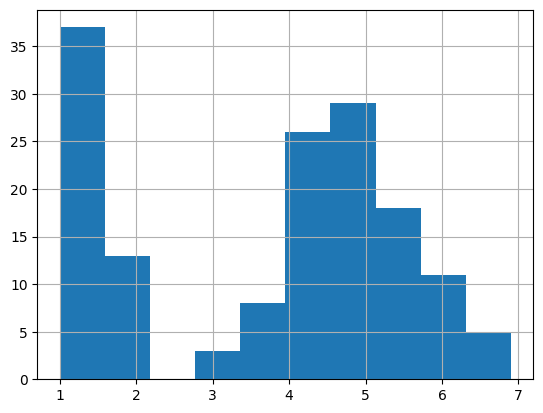

In [81]:
dataset['PetalLengthCm'].hist()

<Axes: >

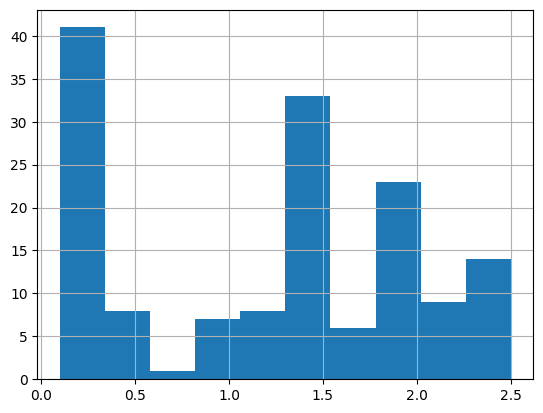

In [82]:
dataset['PetalWidthCm'].hist()

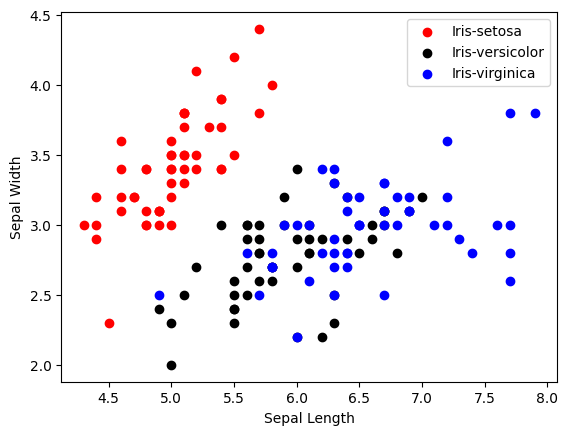

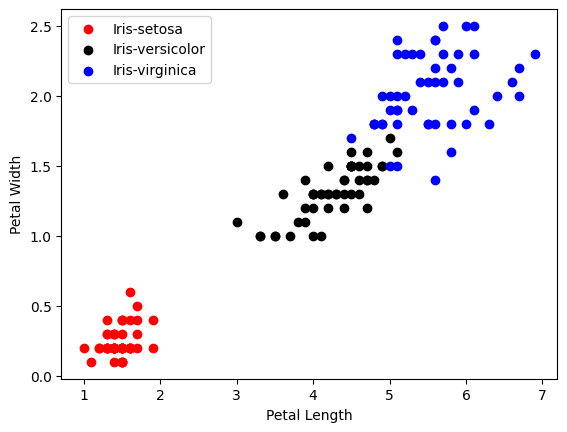

In [83]:
#Scatter plots
color_of_classes = ['red', 'black', 'blue']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    feature = dataset[dataset['Species'] == classes[i]]
    plt.scatter(feature['SepalLengthCm'], feature['SepalWidthCm'], color=color_of_classes[i], label=classes[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

for i in range(3):
    feature = dataset[dataset['Species'] == classes[i]]
    plt.scatter(feature['PetalLengthCm'], feature['PetalWidthCm'], color=color_of_classes[i], label=classes[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

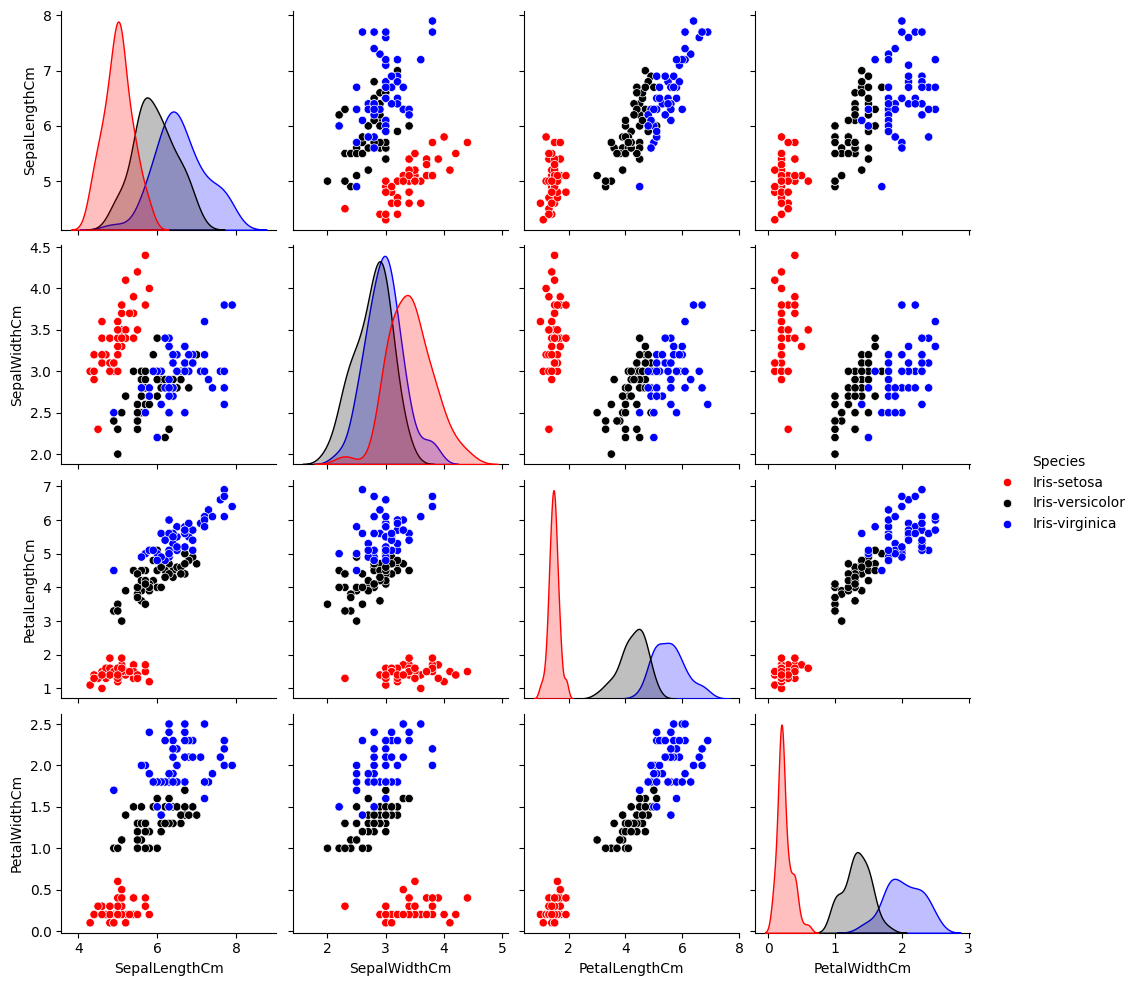

In [84]:
sns.pairplot(dataset, hue='Species', palette={'Iris-setosa': 'red', 'Iris-versicolor': 'black', 'Iris-virginica': 'blue'})

In [85]:
#now, correlation matrix
correlation_matrix = dataset.drop('Species', axis = 1).corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


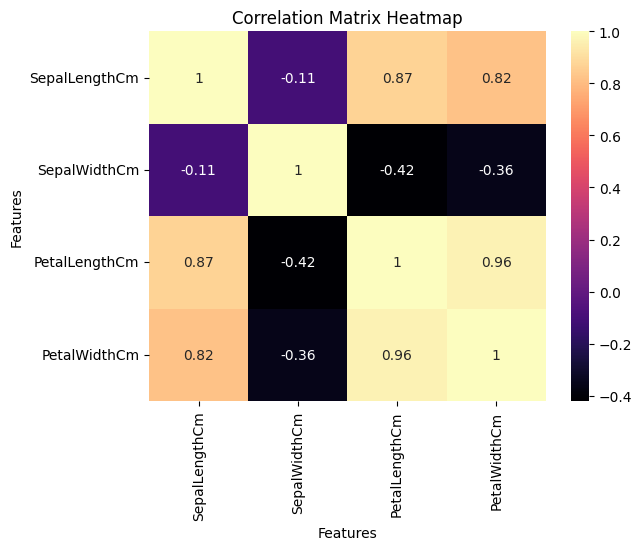

In [86]:
#heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [87]:
#label encoder 
label_encoder = LabelEncoder()
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])
dataset.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


TRAINING THE MODEL 🏋💪

In [88]:
X = dataset.drop('Species', axis=1)
Y = dataset['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [91]:
#training on dataset
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [92]:
#predicting the test set
Y_original = Y_test.values
print('Original values of the test set: ', Y_original, '\n')
Y_pred = model.predict(X_test)
print('Prediction Values of the model: ', Y_pred, '\n')
#accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model: ', accuracy * 100, '%')


Original values of the test set:  [2 2 0 0 1 2 0 1 2 1 2 2 1 2 2 0 0 2 1 0 1 0 2 2 1 2 1 1 1 2 1 2 1 1 1 1 0
 2 1 0 2 0 2 2 2] 

Prediction Values of the model:  [2 2 0 0 1 2 0 1 2 1 2 2 1 2 2 0 0 2 1 0 1 0 2 2 1 2 1 2 1 2 1 2 1 1 1 1 0
 1 1 0 2 0 2 2 2] 

Accuracy of the model:  95.55555555555556 %


CLASSIFICATION REPORT AND CONFUSION MATRIX ALONG WITH EVALUATION METRICSS 🗿

In [93]:
# time to make classification report
model_report = classification_report(Y_test, Y_pred, target_names=label_encoder.classes_)
print('Classification report of the above model\n\n', model_report)

Classification report of the above model

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



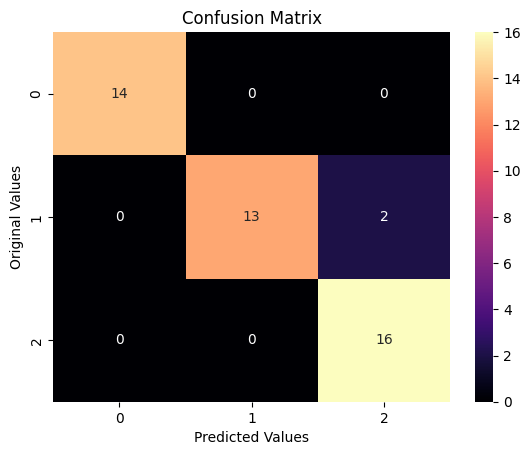

In [68]:
#confusion matrix 
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_matrix_result, annot = True, cmap = 'magma')
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.title('Confusion Matrix')
plt.show()